In [6]:
input_file = 'position_data/Glycerol_in_Castor_0.02mL_15mLmin_20220630_000.txt'

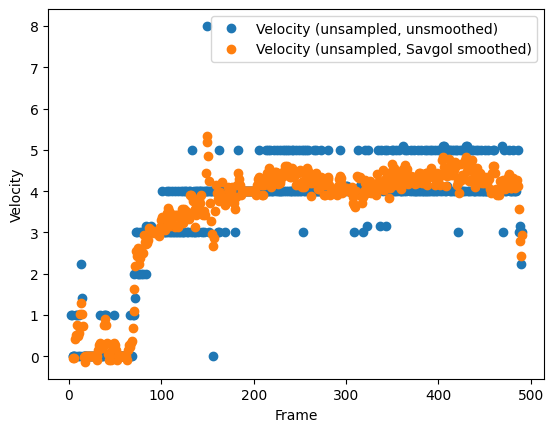

In [7]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

# Load data into a pandas dataframe
df = pd.read_csv(input_file, sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])

# Compute velocity by differentiating the position
dx = df['x'].diff()
dy = df['y'].diff()
df['velocity'] = np.sqrt(dx**2 + dy**2)

# Smooth the velocity data using a Savitzky-Golay filter
window_size = 7
poly_order = 3
df['smooth_velocity'] = savgol_filter(df['velocity'], window_size, poly_order)

# Plot the velocity data
import matplotlib.pyplot as plt

plt.plot(df['frame'], df['velocity'], label='Velocity (unsampled, unsmoothed)', marker='o', linestyle='None')
plt.plot(df['frame'], df['smooth_velocity'], label='Velocity (unsampled, Savgol smoothed)', marker='o', linestyle='None')
plt.xlabel('Frame')
plt.ylabel('Velocity')
plt.legend()
plt.show()

# df[['frame', 'smooth_velocity']].to_csv("inhouse.csv", index=False)


/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_27409/2111089795.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['velocity'] = sampled_dx/sample_rate
/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_27409/2111089795.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['moving_average_velocity'] = sampled_df['velocity'].rolling(window=5, win_type='hamming').mean()
/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_27409/2111089795.py:28: SettingWithCopy

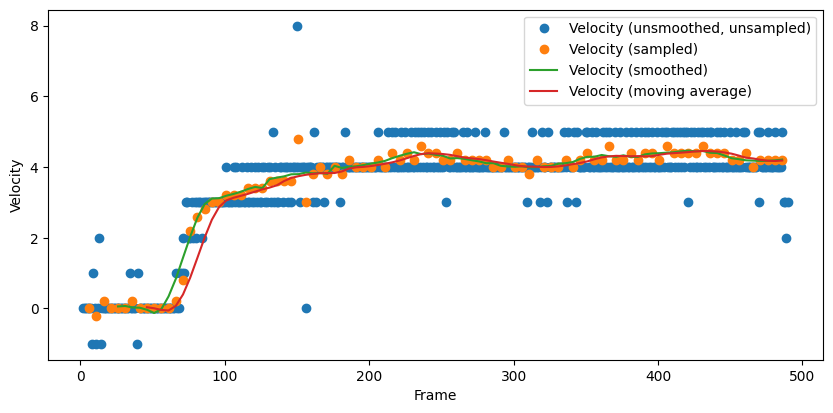

In [8]:
# plot frame vs x from sampled_df

import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

df = pd.read_csv(input_file, sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])
dx = df['x'].diff()
# dy = df['y'].diff()
# df['velocity'] = np.sqrt(dx**2 + dy**2)
df['velocity'] = dx

sample_rate = 5
sampled_df = df[0::sample_rate]

# Compute velocity by differentiating the position
sampled_dx = sampled_df['x'].diff()
# sampled_dy = sampled_df['y'].diff()
# sampled_df['velocity'] = np.sqrt(sampled_dx**2 + sampled_dy**2)/sample_rate
sampled_df['velocity'] = sampled_dx/sample_rate

sampled_df['moving_average_velocity'] = sampled_df['velocity'].rolling(window=5, win_type='hamming').mean()

# Smooth the velocity data using a Savitzky-Golay filter
window_size = 10
poly_order = 3
sampled_df['smooth_velocity'] = savgol_filter(sampled_df['velocity'], window_size, poly_order)
sampled_df['moving_average_smooth_velocity'] = savgol_filter(sampled_df['moving_average_velocity'], window_size, poly_order)


# Plot the velocity data
import matplotlib.pyplot as plt

# multiplot
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

plt.plot(df['frame'], df['velocity'], label='Velocity (unsmoothed, unsampled)', marker='o', linestyle='None')
plt.plot(sampled_df['frame'], sampled_df['velocity'], label='Velocity (sampled)', marker='o', linestyle='None')
plt.plot(sampled_df['frame'], sampled_df['smooth_velocity'], label='Velocity (smoothed)')
plt.plot(sampled_df['frame'], sampled_df['moving_average_smooth_velocity'], label='Velocity (moving average)')


plt.xlabel('Frame')
plt.ylabel('Velocity')
plt.legend()
plt.show()


In [9]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import plotly.graph_objs as go

df = pd.read_csv(input_file, sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])
dx = df['x'].diff()
df['velocity'] = dx

# Set the desired sampling rate
sample_rate = 7

# Sample the data
sampled_df = df.iloc[::sample_rate, :].reset_index(drop=True)

# Compute velocity by differentiating the position
sampled_dx = sampled_df['x'].diff()
sampled_df['velocity'] = sampled_dx/sample_rate

# Compute moving average of velocity
window_size = 5
sampled_df['moving_average_velocity'] = sampled_df['velocity'].rolling(window=window_size, win_type='hamming').mean()

# Smooth the velocity data using a Savitzky-Golay filter
window_size = 10
poly_order = 3
sampled_df['smooth_velocity'] = savgol_filter(sampled_df['velocity'], window_size, poly_order)
sampled_df['moving_average_smooth_velocity'] = savgol_filter(sampled_df['moving_average_velocity'], window_size, poly_order)

# Create traces for the side-by-side plots
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['frame'], y=df['velocity'], name='Velocity (unsmoothed, unsampled)', mode='markers'))
fig.add_trace(go.Scatter(x=sampled_df['frame'], y=sampled_df['velocity'], name='Velocity (sampled)', mode='markers'))
fig.add_trace(go.Scatter(x=sampled_df['frame'], y=sampled_df['smooth_velocity'], name='Velocity (savgol smoothed)'))
fig.add_trace(go.Scatter(x=sampled_df['frame'], y=sampled_df['moving_average_smooth_velocity'], name='Velocity (moving average)'))

# Set layout options
fig.update_layout(
    title='Velocity vs. Frame',
    xaxis_title='Frame',
    yaxis_title='Velocity',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    width=800,
    height=600,
)

# Display the plot
fig.show()


In [10]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import plotly.graph_objs as go

# Read the data
df = pd.read_csv('position_data/Glycerol_in_Castor_0.02mL_15mlmin_20220630_000.txt', sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])

# Compute velocity by differentiating the position
dx = df['x'].diff()
df['velocity'] = dx

# Define the initial sample rate
initial_sample_rate = 5

# Compute the initial sampled data
sampled_df = df.iloc[::initial_sample_rate, :].reset_index(drop=True)
sampled_dx = sampled_df['x'].diff()
sampled_df['velocity'] = sampled_dx/initial_sample_rate

# Create traces for the side-by-side plots
fig = go.Figure()

# Add trace for the initial sampled data
fig.add_trace(go.Scatter(x=sampled_df['frame'], y=sampled_df['velocity'], name=f'Velocity (sample_rate={initial_sample_rate})'))

# Define the slider steps
slider_steps = []
for sample_rate in range(1, 11):
    # Sample the data
    sampled_df = df.iloc[::sample_rate, :].reset_index(drop=True)
    sampled_dx = sampled_df['x'].diff()
    sampled_df['velocity'] = sampled_dx/sample_rate

    # Smooth the velocity data using a Savitzky-Golay filter
    window_size = 10
    poly_order = 3
    sampled_df['smooth_velocity'] = savgol_filter(sampled_df['velocity'], window_size, poly_order)
    sampled_df['moving_average_smooth_velocity'] = sampled_df['smooth_velocity'].rolling(window=5, win_type='hamming').mean()

    # Add the trace for the current sample rate to the figure
    fig.add_trace(go.Scatter(x=sampled_df['frame'], y=sampled_df['smooth_velocity'], visible=False, name=f'Velocity (sample_rate={sample_rate})'))

    # Define the slider step for the current sample rate
    slider_step = dict(
        method="update",
        label=f"Sample rate={sample_rate}",
        args=[{"visible": [False] * (len(fig.data) - 1) + [True]},
              {"title": f"Velocity vs. Frame (Sample rate = {sample_rate})"}]
    )
    slider_steps.append(slider_step)

# Add the slider to the figure
fig.update_layout(
    sliders=[dict(
        steps=slider_steps,
        active=initial_sample_rate - 1,
        currentvalue={"prefix": "Sample rate: "},
        pad={"t": 50},
        len=1)
    ],
    title='Velocity vs. Frame (Sample rate = 5)',
    xaxis_title='Frame',
    yaxis_title='Velocity',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    width=800,
    height=600,
)

# Display the plot
fig.show()
